In [1]:
# Importing base libraries for analysis
import numpy as np
import pandas as pd

import sqlite3

In [2]:
sqlite3.sqlite_version

'3.37.2'

### Data generation for analysis

In [3]:
# Start creating the 'parcel_aggr' dataset and creating the 'parcel_id' column
parcel_aggr = pd.DataFrame({'parcel_id': range(100)})

In [4]:
# Creating the 'accept_date' column
parcel_aggr['accept_date'] = pd.Series(pd.date_range(start='2022-04-01'
                                                    , end='2022-04-30'))\
                                        .sample(100, replace=True, random_state=42)\
                                .values

In [5]:
# Creating the 'index_id' column
parcel_aggr['index_id'] = pd.Series(range(10))\
                            .sample(100, replace=True, random_state=42)\
                            .values

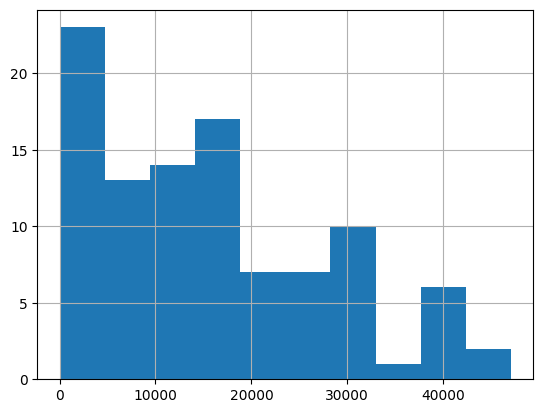

In [6]:
np.random.seed(42)
pd.Series(np.abs(np.random.normal(10000, 20000, size=100))).hist();

In [7]:
# Creating the 'weight' column
np.random.seed(42)
parcel_aggr['weight'] = np.round(np.abs(np.random.normal(10000
                                                        , 20000
                                                        , size=100)))\
                            .astype(int)

In [8]:
# Creating the 'price' column
np.random.seed(42)
parcel_aggr['price'] = np.round(np.abs(np.random.normal(10000
                                                        , 20000
                                                        , size=100)))\
                            .astype(int)

In [9]:
# Creating the 'client_type' column
parcel_aggr['client_type'] = pd.Series(['individual'
                                        , 'legal'])\
                                .sample(100, replace=True, random_state=42)\
                                .values

In [10]:
# Checking for unique the postcode
parcel_aggr.index_id.unique()

array([6, 3, 7, 4, 9, 2, 5, 1, 0, 8], dtype=int64)

In [11]:
# Checking distributions of values across postcode
parcel_aggr.index_id.value_counts()

7    15
8    12
6    11
9    11
4    10
1    10
3     9
2     9
0     7
5     6
Name: index_id, dtype: int64

In [12]:
parcel_aggr

,parcel_id,accept_date,index_id,weight,price,client_type
0,0,2022-04-07,6,19934,19934,individual
1,1,2022-04-20,3,7235,7235,legal
2,2,2022-04-29,7,22954,22954,individual
3,3,2022-04-15,4,40461,40461,individual
4,4,2022-04-11,6,5317,5317,individual
...,...,...,...,...,...,...
95,95,2022-04-29,9,19270,19270,legal
96,96,2022-04-18,8,15922,15922,legal
97,97,2022-04-26,6,15221,15221,legal
98,98,2022-04-12,8,10102,10102,legal
